# Solar-System15-Mixed-Precision

<ul id="top">
<li><a href="#Load-packages"> 
             Load Packages</a></li>
    
<li><a href="#Computer-properties"> 
             Computer properties</a></li> 

<li><a href="#Initial-value-problem:-Solar-System15">
              Initial value problem: Solar-System15</a></li>

<li><a href="#Ode-problem">
             Ode problem</a></li>
 
<li><a href="#Error-in-energy">
             Error in energy</a></li> 

<li><a href="#Work-Precision-diagrams">
             Work-Precision diagrams</a></li> 

</ul>  

## Load packages

In [1]:
using OrdinaryDiffEq,DiffEqDevTools,BenchmarkTools
using IRKGaussLegendre
using Plots,LinearAlgebra
using Dates
using RecursiveArrayTools
using JLD2, FileIO

┌ Info: Precompiling IRKGaussLegendre [58bc7355-f626-4c51-96f2-1f8a038f95a2]
└ @ Base loading.jl:1273


In [2]:
setprecision(BigFloat, 108);

In [12]:
#plotly()

<a href="#top">Back to the top</a>

## Computer properties

In [3]:
#export JULIA_NUM_THREADS=2
Threads.nthreads()

1

In [5]:
#;cat /proc/cpuinfo # on Linux machines

In [4]:
using Hwloc
Hwloc.num_physical_cores()

2

<a href="#top">Back to the top</a>

## Initial value problem: Solar-System15

In [5]:
include("../examples/Nbody.jl")
include("../examples/InitialNBody15.jl")
u0128, Gm128 =InitialNBody15(BigFloat)

q0128=u0128[2,:,:]
v0128=u0128[1,:,:]

dt=5
t0=0.0
t1=20*dt    #1000.
mysaveat=1  #10

tspan128=(BigFloat(t0),BigFloat(t1))
prob128=ODEProblem(NbodyODE!,u0128,tspan128,Gm128);

In [6]:
u064, Gm64 =InitialNBody15(Float64)
lpp=Gm64;

In [7]:
tspan128

(0.0, 100.0)

<a href="#top">Back to the top</a>

## Ode problem

### Test solution

In [8]:
prob128 = ODEProblem(NbodyODE!,u0128,tspan128,Gm128,;lpp=lpp);
#sol =solve(prob128,Vern9(),saveat=mysaveat,abstol=1e-24,reltol=1e-24,maxiters=100000);
#@save "./Data/solarsystem15small_test_solF128.jld2" sol
@load "./Data/solarsystem15small_test_solF128.jld2" sol
test_sol = TestSolution(sol);

### IRKGL16 (Fixed-Step)

In [9]:
sol1 =solve(prob128,IRKGL16(),dt=dt,saveat=mysaveat,adaptive=false,mixed_precision=false);
sol1.destats

***************************************************
urratsa=1
1,high-=1,0,0.4232449465403114507272413254244516
1,high-=2,0,0.03899626014515928296360625957200611
1,high-=3,0,0.004380519943726401777403327832838298
1,high-=4,0,0.0007438267656260353019535906051474294
1,high-=5,0,3.859508771545399728852441066907766e-05
1,high-=6,0,6.950822094115910057432439593733854e-06
1,high-=7,0,1.935459847493792507584767960656561e-07
1,high-=8,0,3.525560014816873217891347176199552e-08
1,high-=9,0,7.087476234067045806231599544414526e-10
1,high-=10,0,1.125592813034891468776167497961602e-10
1,high-=11,0,1.783976579371589929242385514970263e-12
1,high-=12,0,2.466625129509870094798229739188307e-13
1,high-=13,24,3.294235622429109580528202800091397e-15
1,high-=14,38,3.941807542545358751935384583095933e-16
1,high-=15,73,4.543179917530951919103653106332662e-18
1,high-=16,137,4.79619206211957037778061240494186e-19
1,high-=17,251,4.879936811049371751626972579897627e-21
1,high-=18,389,4.60846592544863304912474789828

7,high-=1,0,6.5063664699020849845410169093483e-06
7,high-=2,0,1.453699245511011131946836272396713e-06
7,high-=3,0,2.102390131097226631873997228721338e-08
7,high-=4,0,5.735584897787375346068326876696952e-09
7,high-=5,0,5.433204133887167193553809438067727e-11
7,high-=6,0,1.63327068703620361355598286331468e-11
7,high-=7,0,1.204258917780062055800126747796098e-13
7,high-=8,10,3.53256388912454837398825193024457e-14
7,high-=9,45,2.126085149851022458730659922640635e-16
7,high-=10,74,5.881714762968190121327512698693189e-17
7,high-=11,131,3.033907021403917330759457572098968e-19
7,high-=12,213,7.757585470351729396804937539507e-20
7,high-=13,330,3.478794502059125872063139966297733e-22
7,high-=14,496,8.194784604408961560044496748480096e-23
7,high-=15,568,3.047568971318173534316119526307381e-25
7,high-=16,618,5.775504204408338252440912590404266e-26
7,high-=17,637,3.046624952845558246664131392894189e-28
7,high-=18,653,1.612243448595414012231714336432664e-28
7,high-=19,665,3.48669722732103948653309216

14,high-=4,4,8.151156085682359956288154948496032e-13
14,high-=5,14,1.407291338940373878403060164719458e-14
14,high-=6,32,1.099701897920131346829851604059106e-15
14,high-=7,60,1.43838403177476545238970132682953e-17
14,high-=8,128,1.147514533747274550555174181558004e-18
14,high-=9,227,1.199870140904780168390393089465545e-20
14,high-=10,351,9.210306146579951030166818112081439e-22
14,high-=11,481,8.175494526252207394674305749251777e-24
14,high-=12,578,5.843814486599999246816574151068553e-25
14,high-=13,626,4.45871298436412395279946631303142e-27
14,high-=14,654,2.930798254547718658473616964330741e-28
14,high-=15,667,1.753207211875910663763758225076165e-30
14,high-=16,684,8.36502182980343408043707485670972e-32
14,high-=17,701,2.893913836052196238753451714460353e-33
14,high-=18,717,2.708338984294550418359968981760054e-35
14,high-=19,720,0.0
***************************************************
urratsa=15
15,high-=1,0,1.485787573537388410538139060232853e-08
15,high-=2,0,2.00689128887374439004079

DiffEqBase.DEStats
Number of function 1 evaluations:                  3411
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          20
Number of rejected steps:                          0

In [10]:
sol2 = solve(prob128,IRKGL16(),dt=dt,saveat=mysaveat,adaptive=false,
                             mixed_precision=true, low_prec_type=Float64);
sol2.destats

***************************************************
urratsa=1
1,low-=1,0,0.4232449465403114557862288077999429
1,low-=2,0,0.03899626014515927855353565063361201
1,low-=3,0,0.004380519943726390711251537111659922
1,low-=4,0,0.0007438267656260339191934656661794764
1,low-=5,0,3.859508771545439152397977300947147e-05
1,low-=6,40,6.950822094114814635418425188094528e-06
1,low-=7,88,1.935459847462509377069176525007624e-07
1,low-=8,104,3.52556001478187851585694297051636e-08
1,low-=9,208,7.087476230046886366890068841503684e-10
1,low-=10,336,1.125592869838852173180386636431008e-10
1,low-=11,528,1.783973312890760767033700753977839e-12
1,low-=12,600,2.466666145562603828292774509051371e-13
1,low-=13,640,3.290005333084655006578350637620317e-15
1,low-=14,640,3.917758479087410216582093217550734e-16
1,low-=15,656,4.128489530627910826436591105273339e-18
1,low-=16,712,6.193258894593091264937166542591196e-19
1,low-=17,720,0.0
 
1,high-=18,0,1.067772955181154183558952970896837e-17
1,high-=19,0,1.00906061764288

6,low-=8,624,3.65049831816469873522703150618708e-14
6,low-=9,624,2.627506594537807707642751717512893e-15
6,low-=10,640,7.607045028567442305609342833397715e-17
6,low-=11,672,3.565683358079212653454475789787666e-18
6,low-=12,712,1.39763298299858605393316536126904e-20
6,low-=13,720,0.0
 
6,high-=14,0,9.302601410499782015745159282671683e-18
6,high-=15,0,5.483691367073117889211384722043336e-18
6,high-=16,0,1.857591134576922011209158273462543e-19
6,high-=17,44,1.361642488878558253093156139591077e-19
6,high-=18,157,2.841983656916316387322064841146976e-21
6,high-=19,279,1.651342642118812758100204155959257e-21
6,high-=20,377,2.175229643293502037214284751891037e-23
6,high-=21,503,1.002243994437219101749015071026573e-23
6,high-=22,561,9.820167787920614038128843206953655e-26
6,high-=23,617,3.789071756607503063470800377323218e-26
6,high-=24,644,2.899727000086691389072271175526537e-28
6,high-=25,661,9.738038263728675042237850290888307e-29
6,high-=26,678,6.085544154857873194637524191460892e-31
6,high

12,high-=10,0,9.931176168577592339741009727917706e-18
12,high-=11,0,2.705267658551270783679470834391973e-18
12,high-=12,0,1.156449314211066949235529488677361e-19
12,high-=13,43,1.209513555823664774183980347173319e-20
12,high-=14,152,5.738275583746194934389253240576485e-22
12,high-=15,276,2.267102854523709171258559106144763e-23
12,high-=16,403,1.41326692384095742269057952392747e-24
12,high-=17,517,3.570337213116084121652446732362732e-26
12,high-=18,591,2.084367397072432327914094914886389e-27
12,high-=19,634,6.834290236511062408421212370579275e-29
12,high-=20,674,1.992677109340444424621564220611399e-30
12,high-=21,697,1.097248381824661008134916541231931e-31
12,high-=22,709,2.455796688578541350534731889732087e-33
12,high-=23,720,0.0
***************************************************
urratsa=13
13,low-=1,0,1.117364415158452000538278168593947e-08
13,low-=2,136,8.784116936767895361444276725901469e-10
13,low-=3,312,1.337693094820383085797928810378089e-11
13,low-=4,560,8.914774241881537255702

18,high-=17,281,5.351814698594492583851225392054798e-22
18,high-=18,395,4.880728016369633245243863734854013e-24
18,high-=19,512,2.678844069456026354094496780051805e-24
18,high-=20,571,1.700026061433722834749951734766893e-26
18,high-=21,616,7.727496113121329048832414728653949e-27
18,high-=22,647,3.865395299570402541780321902974605e-29
18,high-=23,679,1.464721921544962517827514189040918e-29
18,high-=24,694,6.087145543852515005446790208057008e-32
18,high-=25,713,1.973960754750999644531734045348964e-32
18,high-=26,716,1.129176520433719034981869705744232e-34
18,high-=27,719,3.851859888774471706111955885169855e-34
18,high-=28,720,0.0
***************************************************
urratsa=19
19,low-=1,0,1.043791470148301919580732181103382e-06
19,low-=2,88,2.540790245608374374539196919853626e-07
19,low-=3,144,5.02558491710362023725381198798666e-09
19,low-=4,216,1.192966937678720688614555234253663e-09
19,low-=5,376,1.967068584611203005884252912801676e-11
19,low-=6,584,3.8733949902149436236

DiffEqBase.DEStats
Number of function 1 evaluations:                  2345
Number of function 2 evaluations:                  1840
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          20
Number of rejected steps:                          0

<a href="#top">Back to the top</a>

## DynamicalProblem

In [11]:
probdyn128 = DynamicalODEProblem(NbodyODEq!,NbodyODEv!,q0128,v0128,tspan128,Gm128,;lpp=lpp);

### IRKGL16 (Fixed-Step)

In [12]:
sol11 =solve(probdyn128,IRKGL163(),dt=dt,saveat=mysaveat,adaptive=false,mixed_precision=false);
sol11.destats

***************************************************
urratsa=1
1,high-=1,0,0.423264502200801057704724142043101
1,high-=2,0,0.03974305689802520225934391347263163
1,high-=3,0,0.0007677995629451631987034540397193995
1,high-=4,0,7.101929428964485032587266957066325e-06
1,high-=5,0,3.587164892647078932407544279107084e-08
1,high-=6,0,1.14136033849572328329041514962064e-10
1,high-=7,0,2.495754547034388447333235030728801e-13
1,high-=8,74,3.981708713786040760072176242979523e-16
1,high-=9,180,4.838726938660758591705498245336069e-19
1,high-=10,444,4.644868370903647906831481652254607e-22
1,high-=11,612,3.646834140509774425124863733035963e-25
1,high-=12,648,2.645000579103841741686483061647879e-28
1,high-=13,674,5.168604188085541287449287247398627e-30
1,high-=14,700,3.517858958112561648540035660193984e-32
1,high-=15,720,0.0
***************************************************
urratsa=2
2,high-=1,0,2.120076616269823345737719264928992e-06
2,high-=2,0,5.580713425017035072124019412554438e-07
2,high-=3,0,2.

12,high-=8,654,6.568468829324195196095142826738572e-28
12,high-=9,674,1.446143106994628465694619861399402e-31
12,high-=10,714,1.887018257638204339560653512016258e-33
12,high-=11,720,0.0
***************************************************
urratsa=13
13,high-=1,0,1.117616299489672632421271122020885e-08
13,high-=2,0,8.913480323300114260519327212043808e-10
13,high-=3,4,9.018640666167520148549160037810142e-13
13,high-=4,56,6.617762239193222560285691334829526e-16
13,high-=5,174,3.923619185384546694391097411630291e-19
13,high-=6,422,2.373453745476607817042272557705574e-22
13,high-=7,608,1.410206519744065182822844308699959e-25
13,high-=8,664,7.666490596320549707400706041751656e-29
13,high-=9,692,4.150569635868648416050863699173143e-32
13,high-=10,720,0.0
***************************************************
urratsa=14
14,high-=1,0,8.020766677906203184830862685106199e-09
14,high-=2,0,4.634638169752536935927374686468869e-10
14,high-=3,2,8.22680775785850744432495766660595e-13
14,high-=4,64,1.111333

DiffEqBase.DEStats
Number of function 1 evaluations:                  1877
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          20
Number of rejected steps:                          0

In [13]:
sol12 = solve(probdyn128,IRKGL163(),dt=dt,saveat=mysaveat,adaptive=false,
                             mixed_precision=true, low_prec_type=Float64);
sol12.destats

***************************************************
urratsa=1
1,low-=1,0,0.4232645022008010628619448425589835
1,low-=2,0,0.03974305689802520496087189432331014
1,low-=3,0,0.0007677995629451621186065868767219931
1,low-=4,80,7.101929428957130977884628323410491e-06
1,low-=5,208,3.587164892588592797400728211769113e-08
1,low-=6,480,1.14136034704709626950033147682741e-10
1,low-=7,576,2.495758767505985552270764888705532e-13
1,low-=8,656,3.947243729888324629420104628995512e-16
1,low-=9,704,6.193258894593091264937166542591196e-19
1,low-=10,720,0.0
 
1,high-=11,0,1.068183888941587697971518872887376e-17
1,high-=12,0,1.00995497913419514594102486508454e-17
1,high-=13,38,1.809472667273933185441180619859521e-19
1,high-=14,264,1.406600832148910129709761795026471e-21
1,high-=15,502,6.226337275552621151057688363373259e-24
1,high-=16,612,1.821003158071994897900436491357459e-26
1,high-=17,670,3.82758129947458972634537411782304e-29
1,high-=18,700,6.125435629454111629537134750319098e-32
1,high-=19,720,0.0
**

10,high-=9,0,3.183374197041617586983943753735982e-18
10,high-=10,30,1.671919009172610466077158840007349e-20
10,high-=11,278,3.485491150695532973584862023373559e-23
10,high-=12,502,2.02699753808869522307421144132713e-25
10,high-=13,626,6.295827361077117294342610388541487e-28
10,high-=14,696,1.083779146227968047251544448112462e-30
10,high-=15,718,1.540743955509788682444782354067942e-33
10,high-=16,720,0.0
***************************************************
urratsa=11
11,low-=1,0,7.147105524738292795260413838061249e-08
11,low-=2,256,9.793285653657999199146683097008311e-09
11,low-=3,576,1.6151643694412286782591957368729e-11
11,low-=4,624,2.128107862140252242848185515095108e-14
11,low-=5,672,2.348012565957023062758355038882169e-17
11,low-=6,720,0.0
 
11,high-=7,0,7.751608176720706179692433343593853e-18
11,high-=8,0,3.746415990288676030766019748016751e-18
11,high-=9,38,1.57975264510054822327570235682973e-20
11,high-=10,274,3.776575048603698239918400713512583e-23
11,high-=11,508,9.07610637706

20,high-=12,490,2.851249221459309665303036092722162e-23
20,high-=13,606,1.316201557298812035137210640831348e-25
20,high-=14,658,4.149737588340740871417470879230171e-28
20,high-=15,680,9.491618781723740374883293975581994e-31
20,high-=16,704,2.64245729930855661473922353917366e-33
20,high-=17,720,0.0


DiffEqBase.DEStats
Number of function 1 evaluations:                  2484
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          20
Number of rejected steps:                          0

<a href="#top">Back to the top</a>

## Error in energy

In [15]:
setprecision(BigFloat, 256)
u0128, Gm128 =InitialNBody15(BigFloat)
E0=NbodyEnergy(u0128,Gm128)

ΔE = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol.u)./E0.-1
ΔE1 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol1.u)./E0.-1
ΔE2 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol2.u)./E0.-1
ΔE11 = map(x->NbodyEnergy2(BigFloat.(x),Gm128), sol11.u)./E0.-1
ΔE12 = map(x->NbodyEnergy2(BigFloat.(x),Gm128), sol12.u)./E0.-1

(Float32(maximum(abs.(ΔE))),Float32(maximum(abs.(ΔE1))),Float32(maximum(abs.(ΔE2))),Float32(maximum(abs.(ΔE11))),Float32(maximum(abs.(ΔE12))))

(1.2841041f-27, 2.5345949f-21, 2.5345949f-21, 2.5345949f-21, 2.5345949f-21)

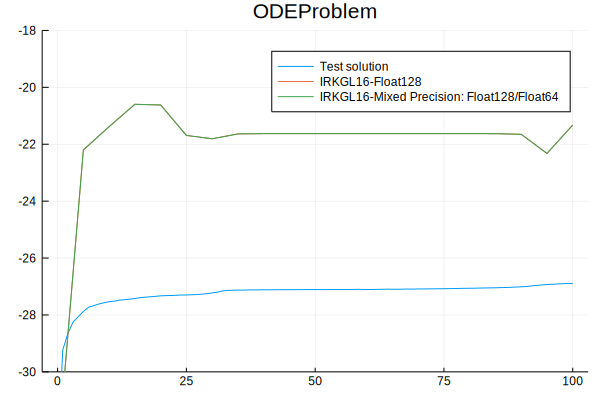

In [19]:
ylimit1=-30
ylimit2=-18
plot(sol.t,log10.(abs.(ΔE)), label="Test solution", title="ODEProblem",
    ylims=(ylimit1,ylimit2),)
plot!(sol1.t,log10.(abs.(ΔE1)), label="IRKGL16-Float128",
     ylims=(ylimit1,ylimit2),)
plot!(sol2.t,log10.(abs.(ΔE2)), label="IRKGL16-Mixed Precision: Float128/Float64",
     ylims=(ylimit1,ylimit2),)

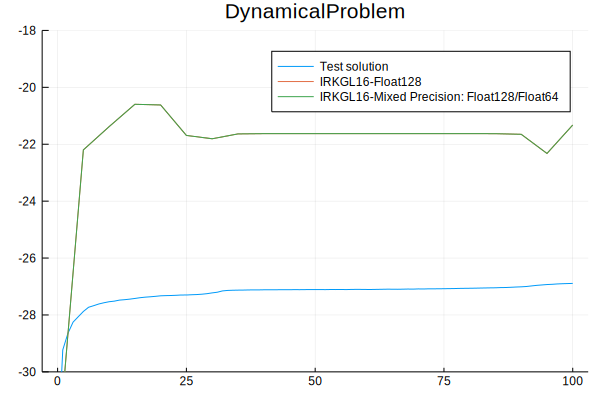

In [17]:
ylimit1=-30
ylimit2=-18
plot(sol.t,log10.(abs.(ΔE)), label="Test solution", title="DynamicalProblem",
    ylims=(ylimit1,ylimit2),)
plot!(sol1.t,log10.(abs.(ΔE11)), label="IRKGL16-Float128",
     ylims=(ylimit1,ylimit2),)
plot!(sol2.t,log10.(abs.(ΔE12)), label="IRKGL16-Mixed Precision: Float128/Float64",
     ylims=(ylimit1,ylimit2),)

<a href="#top">Back to the top</a>

## Work-Precision diagrams

In [22]:
Threads.nthreads()

1

In [25]:
abstols = 1.0 ./ 10.0 .^ (8:18)
reltols = 1.0 ./ 10.0 .^ (8:18)
dts=16*0.866.^(0:length(reltols)-1);

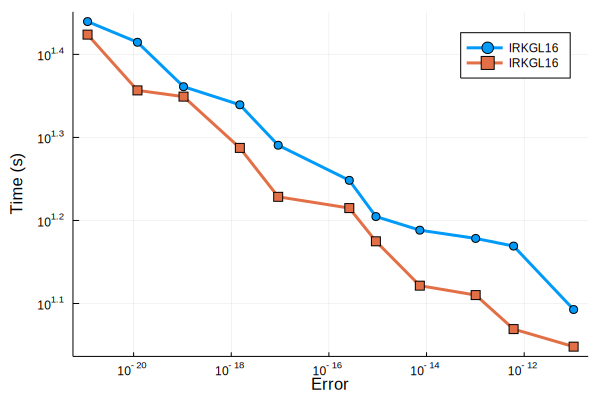

In [24]:
setups = [ Dict(:alg=>IRKGL16(),:adaptive=>false,:dts=>dts,:mixed_precision=>false) 
           Dict(:alg=>IRKGL16(),:adaptive=>false,:dts=>dts,:mixed_precision=>true,:low_prec_type=>Float64)
]
wp1 = WorkPrecisionSet(prob128,abstols,reltols,setups;appxsol=test_sol,save_everystep=false,numruns=1,maxiters=1000000)
plot(wp1)

<a href="#top">Back to the top</a>